# Material zur Fallstudie

In dieser Fallstudie unterst√ºtzen Sie einen Stromversorger bei seiner Investitionsentscheidung f√ºr neue Kraftwerke. Ihre Aufgabe ist es, den Kapitalwert verschiedener Stromerzeugungstechnologien zu berechnen und dabei Unsicherheiten in der Entwicklung von Strom- und Brennstoffpreisen zu ber√ºcksichtigen. Anschlie√üend sollen die Ergebnisse analysiert und interpretiert werden, um die Entscheidungsfindung des Unternehmens zu unterst√ºtzen.

Dieses Notebook gliedert sich wie folgt:

**1. Organisation der Fallstudie** Beschreibung des organisatorischen Ablaufs der Fallstudie  
**2:** Grundlagen und Wiederholung: Erl√§uterung der Konzepte, die Sie zur Bearbeitung der Fallstudie ben√∂tigen  
**3:** Aufgabenstellung und Bereitstellung der Daten f√ºr die Fallstudie


## 1. Organisation der Fallstudie

Die Bearbeitung der Fallstudie ist folgenderma√üen organisiert:

- Alle notwendigen Materialien zur Bearbeitung der Fallstudie finden Sie in diesem Moodle-Kurs.
- Zur Bearbeitung empfehlen wir Excel, LibreOffice oder OpenOffice. Alternativ k√∂nnen Sie aber auch Python oder eine andere Programmiersprache verwenden.
- Es gibt eine √úbung zur Fallstudie am 28.05.2025. Alle weiteren Aufgaben zur Fallstudie m√ºssen asynchron bearbeitet werden.
- Sie k√∂nnen bis zu 5 Bonuspunkte f√ºr die Klausur erwerben (Gesamtpunktzahl: 60 Punkte).
- Mit dem Material in diesem Notebook berechnen Sie alle Ergebnisse und erstellen einige Diagramme.
- Im Theorieteil dieses Notebooks finden Sie einige Verst√§ndnisfragen. Diese dienen lediglich Ihrer Selbst√ºberpr√ºfung und haben keinen Einfluss auf die Bonuspunkte.
- Dei Bewertung der Fallstudie erfolgt anhand der von Ihnen abgegebenen Berechnungen (z. B. Ihr LibreOffice Calc Dokument)
  

## 2. Grundlagen und Wiederholung

## 2.1 Energiem√§rkte

### Stromm√§rkte

Kraftwerksbetreiber k√∂nnen auf verschiedenen M√§rkten t√§tig sein, um Gewinne zu erzielen:

- **Terminm√§rkte (Forward/Future Markets)**: langfristige Liefervertr√§ge, Jahre im Voraus abgeschlossen.
- **Gro√ühandelsm√§rkte (Spotm√§rkte)**:
  - **Day-Ahead-Markt**: Strom f√ºr den Folgetag.
  - **Intraday-Markt**: Strom f√ºr den gleichen Tag, oft bis kurz vor Lieferbeginn.

> **Begriff:** *Merit-Order* ‚Äì Angebotsreihung nach Grenzkosten. Der Preis richtet sich nach dem teuersten noch ben√∂tigten Kraftwerk.

Zus√§tzlich gibt es den **Regelenergiemarkt**. Dort schreiben √úbertragungsnetzbetreiber verschiedene Arten von Reserveleistung aus:

- **Prim√§rreserve**: innerhalb weniger Sekunden verf√ºgbar,
- **Sekund√§rreserve**: Reaktion nach ca. 5 Minuten,
- **Terti√§rreserve**: manuell zuschaltbar, ab 15 Minuten.

> **Hinweis:** In der Fallstudie betrachten wir ausschlie√ülich die Gewinne am Gro√ühandelsmarkt.

### Zahlungsstr√∂me von Kraftwerken

Ein Kraftwerk mit installierter elektrischer Leistung $P_{\text{inst}}$ (MW), Wirkungsgrad $\eta$ und Volllaststunden $FL$ produziert eine elektrische Energiemenge $Q$ (MWh) im Jahr.

**Einnahmen durch Stromverkauf**

$$\text{CF}_{\text{Verkauf}} = p \cdot Q$$

$$Q = FL \cdot P_{\text{inst}}$$

> Volllaststunden sind ein theoretisches Ma√ü f√ºr die j√§hrliche Auslastung eines Kraftwerks. Sie geben an, wie viele Stunden ein Kraftwerk mit seiner **maximalen Leistung** betrieben werden m√ºsste, um die tats√§chliche Jahresproduktion zu erreichen.
> Beispiel: Ein Kraftwerk mit 5 MW Leistung, das 2000 h pro Jahr mit 50 % Auslastung l√§uft (also 2,5 MW), produziert:
>$$2,5 \text{MW} \cdot 2000 \text{h} = 5.000 \text{MWh}$$
> Um dieselbe Energiemenge mit **Volllast (5 MW)** zu erzeugen, w√§ren nur
>$$5 \text{MW} \cdot 1000 \text{h} = 5.000 \text{MWh}$$
> n√∂tig. Das Kraftwerk lief also 1000 Volllaststunden.

**Fixe Betriebskosten (FOM ‚Äì Fixed Operation & Maintenance Costs)**

$$\text{CF}_{\text{FOM}} = -\text{FOM} \cdot P_{\text{inst}}$$

**Variable Betriebskosten (VOM ‚Äì Variable Operation & Maintenance Costs)**

$$\text{CF}_{\text{VOM}} = -\text{VOM} \cdot Q$$

**Brennstoffkosten**

$$Q = Q_{\text{fuel}} \cdot H \cdot \eta$$

$$Q_{\text{fuel}} = \frac{Q}{H \cdot \eta}$$

$$\text{CF}_{\text{fuel}} = -\frac{Q \cdot p_{\text{fuel}}}{H \cdot \eta}$$

**CO‚ÇÇ-Kosten**

$$\text{CF}_{\text{CO}_2} = -\frac{Q \cdot e_{\text{CO}_2} \cdot p_{\text{CO}_2}}{H \cdot \eta}$$

### Zahlungsstr√∂me von Speichern

**Investitionskosten von Speichern**

$$I_{\text{storage,total}} = I_{\text{charge}} + EP \cdot I_{\text{storage}}$$

**Kauf und Verkauf von Strom**

$$\text{CF}_{\text{Kauf}} = -p_{\text{buy}} \cdot Q_{\text{charge}}$$
$$\text{CF}_{\text{Verkauf}} = p_{\text{sell}} \cdot Q_{\text{discharge}}$$

$$Q_{\text{discharge}} = \eta^2 \cdot Q_{\text{charge}}$$

```python
# Beispiel: Wirtschaftlichkeit eines Gaskraftwerks
import matplotlib.pyplot as plt

# Schritt 1: Gegebene Werte definieren
leistung_mw = 20            # installierte Leistung in MW
vollaststunden = 3000       # Volllaststunden im Jahr
strompreis = 80             # Strompreis in ‚Ç¨/MWh
vom = 10                    # variable Betriebskosten in ‚Ç¨/MWh
fom = 50_000                # fixe Betriebskosten in ‚Ç¨/MW/a

# Schritt 2: Produktion berechnen (Energieerzeugung in MWh)
produktion_mwh = leistung_mw * vollaststunden

# Schritt 3: Cashflows berechnen
einnahmen = strompreis * produktion_mwh
kosten_vom = vom * produktion_mwh
kosten_fom = fom * leistung_mw
jahresgewinn = einnahmen - kosten_vom - kosten_fom

# Schritt 4: Ausgabe formatieren
def format_eur(value):
    return f"{value:,.0f} ‚Ç¨".replace(",", ".")

print(f"Produktion: {produktion_mwh:,} MWh".replace(",", "."))
print(f"Einnahmen: {format_eur(einnahmen)}")
print(f"Variable Kosten: {format_eur(kosten_vom)}")
print(f"Fixkosten: {format_eur(kosten_fom)}")
print(f"J√§hrlicher Gewinn: {format_eur(jahresgewinn)}")

# Visualisierung der Cashflow-Komponenten
komponenten = ['Einnahmen', 'Variable Kosten', 'Fixkosten', 'Gewinn']
werte = [einnahmen/1000, -kosten_vom/1000, -kosten_fom/1000, jahresgewinn/1000]
farben = ['green', 'red', 'orange', 'blue']

plt.figure(figsize=(10, 6))
bars = plt.bar(komponenten, werte, color=farben, alpha=0.7)
plt.ylabel('Tausend ‚Ç¨ pro Jahr')
plt.title('Cashflow-Komponenten eines Gaskraftwerks')
plt.grid(True, alpha=0.3)

# Werte auf den Balken anzeigen
for bar, wert in zip(bars, werte):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + (50 if height > 0 else -100),
             f'{wert:.0f}k ‚Ç¨', ha='center', va='bottom' if height > 0 else 'top')

plt.tight_layout()
plt.show()
```



Produktion: 60.000 MWh
Einnahmen: 4.800.000 ‚Ç¨
Variable Kosten: 600.000 ‚Ç¨
Fixkosten: 1.000.000 ‚Ç¨
J√§hrlicher Gewinn: 3.200.000 ‚Ç¨


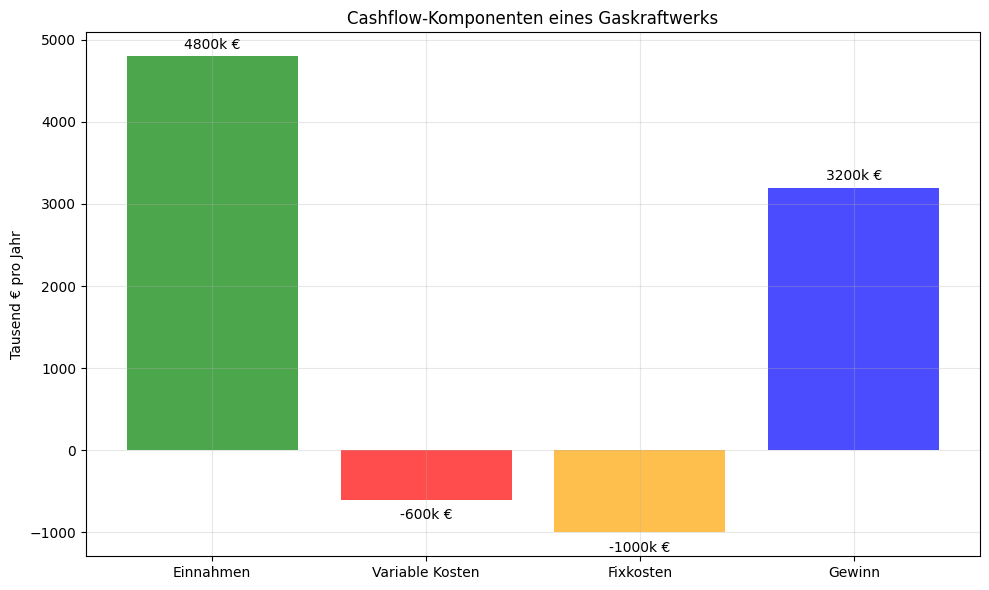

In [16]:
# Beispiel: Wirtschaftlichkeit eines Gaskraftwerks
import matplotlib.pyplot as plt

# Schritt 1: Gegebene Werte definieren
leistung_mw = 20            # installierte Leistung in MW
vollaststunden = 3000       # Volllaststunden im Jahr
strompreis = 80             # Strompreis in ‚Ç¨/MWh
vom = 10                    # variable Betriebskosten in ‚Ç¨/MWh
fom = 50_000                # fixe Betriebskosten in ‚Ç¨/MW/a

# Schritt 2: Produktion berechnen (Energieerzeugung in MWh)
produktion_mwh = leistung_mw * vollaststunden

# Schritt 3: Cashflows berechnen
einnahmen = strompreis * produktion_mwh
kosten_vom = vom * produktion_mwh
kosten_fom = fom * leistung_mw
jahresgewinn = einnahmen - kosten_vom - kosten_fom

# Schritt 4: Ausgabe formatieren
def format_eur(value):
    return f"{value:,.0f} ‚Ç¨".replace(",", ".")

print(f"Produktion: {produktion_mwh:,} MWh".replace(",", "."))
print(f"Einnahmen: {format_eur(einnahmen)}")
print(f"Variable Kosten: {format_eur(kosten_vom)}")
print(f"Fixkosten: {format_eur(kosten_fom)}")
print(f"J√§hrlicher Gewinn: {format_eur(jahresgewinn)}")

# Visualisierung der Cashflow-Komponenten
komponenten = ['Einnahmen', 'Variable Kosten', 'Fixkosten', 'Gewinn']
werte = [einnahmen/1000, -kosten_vom/1000, -kosten_fom/1000, jahresgewinn/1000]
farben = ['green', 'red', 'orange', 'blue']

plt.figure(figsize=(10, 6))
bars = plt.bar(komponenten, werte, color=farben, alpha=0.7)
plt.ylabel('Tausend ‚Ç¨ pro Jahr')
plt.title('Cashflow-Komponenten eines Gaskraftwerks')
plt.grid(True, alpha=0.3)

# Werte auf den Balken anzeigen
for bar, wert in zip(bars, werte):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + (50 if height > 0 else -100),
             f'{wert:.0f}k ‚Ç¨', ha='center', va='bottom' if height > 0 else 'top')

plt.tight_layout()
plt.show()

## 2.2 Kapitalwert

### Kapitalwert (Net Present Value, NPV)

$$\text{NPV} = \sum_{t=0}^{T} \frac{\text{CF}_t}{(1 + r)^t}$$

> Der Kapitalwert (Net Present Value, NPV) dr√ºckt aus, wie viel ein Projekt unter Ber√ºcksichtigung der Zeitwerts des Geldes heute wert ist. Alle zuk√ºnftigen Ein- und Auszahlungen werden mit einem festen Zinssatz auf den heutigen Wert abgezinst.

### Beispielhafte Berechnung

**Aufgabe:**
Ein Projekt erfordert eine Anfangsinvestition von 1.000.000 ‚Ç¨. Es generiert √ºber 10 Jahre hinweg j√§hrlich 150.000 ‚Ç¨ R√ºckfl√ºsse. Berechne den Kapitalwert bei einem Zinssatz von 5 %.

**Manuelle L√∂sungsschritte:**

$$\text{NPV} = \sum_{t=0}^{10} \frac{\text{CF}_t}{(1 + r)^t}$$

$$\text{NPV} = \frac{-1000000}{(1 + 0{,}05)^0} + \sum_{t=1}^{10} \frac{150000}{(1 + 0{,}05)^t}$$

$$\rightarrow \text{NPV} = 158.739 \text{‚Ç¨}$$

```python
# Kapitalwertberechnung mit fixen R√ºckfl√ºssen
cashflows = [-1000000] + [150000] * 10
zinssatz = 0.05
npv = sum(cf / (1 + zinssatz)**t for t, cf in enumerate(cashflows))
print(f"Kapitalwert (NPV): {npv:.2f} ‚Ç¨")
```

### Interpretation des Kapitalwerts

- Ist der Kapitalwert kleiner als 0 ‚Ç¨, ist die Investition nicht rentabel.
- Betr√§gt der Kapitalwert genau 0 ‚Ç¨, erwirtschaften Sie gerade genug, um Ihre Anfangsinvestition zur√ºckzubekommen, erzielen aber keine Gewinne.
- Ist der Kapitalwert gr√∂√üer als 0 ‚Ç¨, erwarten Sie, Gewinne aus der Investition zu erzielen.

In [8]:
# Kapitalwertberechnung mit fixen R√ºckfl√ºssen
cashflows = [-1000000] + [150000] * 10
zinssatz = 0.05
npv = sum(cf / (1 + zinssatz)**t for t, cf in enumerate(cashflows))
print(f"Kapitalwert (NPV): {npv:.2f} ‚Ç¨")

Produktion: 60000 MWh
Einnahmen: 4800000,00 ‚Ç¨
Variable Kosten: 600000,00 ‚Ç¨
Fixkosten: 1000000,00 ‚Ç¨
J√§hrlicher Gewinn: 3200000,00 ‚Ç¨


## 2.3 Unsicherheitsanalyse

Da die Lebensdauer von Kraftwerken relativ lang ist (typischerweise mehr als 20 Jahre), stellen Investitionen in Energieinfrastrukturen meist langfristige Investitionen dar. Bei der Berechnung des Kapitalwerts (NPV) ist daher ein Gro√üteil der ben√∂tigten Informationen entweder nicht verf√ºgbar oder sehr unsicher (z.B. zuk√ºnftige Strom- oder Brennstoffpreise). Diese Unsicherheiten sollten bei der Berechnung des NPV ber√ºcksichtigt werden, da sie die Rentabilit√§t der Investitionen erheblich beeinflussen k√∂nnen.

In dieser Fallstudie verwenden wir **Normalverteilungen**, um die Bandbreite unsicherer Parameter darzustellen. Mithilfe der **Monte-Carlo-Methode** untersuchen wir den Einfluss der Parameterunsicherheit auf den Kapitalwert. Die Ergebnisse pr√§sentieren wir anschlie√üend als **Boxplots**.

### 2.3.1 Normalverteilung

Die **Normalverteilung** ist eine stetige Wahrscheinlichkeitsverteilung f√ºr reelle Zufallsvariablen. F√ºr eine Zufallsvariable $x$ wird die Normalverteilung wie folgt dargestellt:

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left[-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2\right]$$

Dabei ist:

- $\mu$ der **Mittelwert** (Erwartungswert) der Verteilung
- $\sigma$ die **Standardabweichung**, ein Ma√ü f√ºr die Streuung der Werte um den Mittelwert

Die Normalverteilung wird h√§ufig in Natur- und Sozialwissenschaften verwendet, insbesondere zur Approximation unbekannter Verteilungen. Dies liegt am **Zentralen Grenzwertsatz**, welcher besagt, dass selbst dann, wenn eine Zufallsvariable nicht normalverteilt ist, der Durchschnittswert dieser Zufallsvariable √ºber mehrere Beobachtungen bei einer ausreichend gro√üen Anzahl von Beobachtungen h√§ufig zu einer Normalverteilung konvergiert.


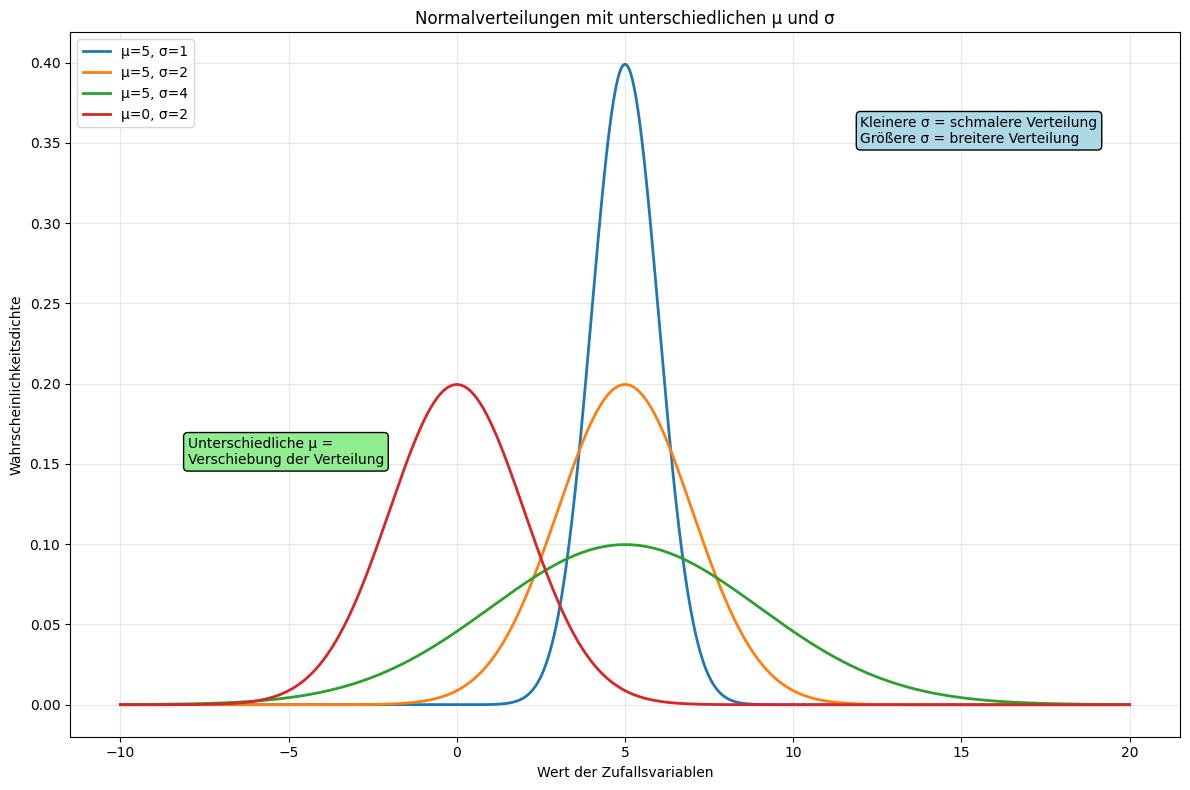

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Wertebereich definieren
x = np.linspace(-10, 20, 1000)

# Normalverteilungen mit unterschiedlichen Œº und œÉ
def normalverteilung(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

y1 = normalverteilung(x, 5, 1)
y2 = normalverteilung(x, 5, 2)
y3 = normalverteilung(x, 5, 4)
y4 = normalverteilung(x, 0, 2)

# Plot erstellen
plt.figure(figsize=(12, 8))
plt.plot(x, y1, label='Œº=5, œÉ=1', linewidth=2)
plt.plot(x, y2, label='Œº=5, œÉ=2', linewidth=2)
plt.plot(x, y3, label='Œº=5, œÉ=4', linewidth=2)
plt.plot(x, y4, label='Œº=0, œÉ=2', linewidth=2)


# Diagramm beschriften
plt.xlabel('Wert der Zufallsvariablen')
plt.ylabel('Wahrscheinlichkeitsdichte')
plt.title('Normalverteilungen mit unterschiedlichen Œº und œÉ')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

# Erkl√§rungen hinzuf√ºgen
plt.text(12, 0.35, 'Kleinere œÉ = schmalere Verteilung\nGr√∂√üere œÉ = breitere Verteilung',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
plt.text(-8, 0.15, 'Unterschiedliche Œº = \nVerschiebung der Verteilung',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))

plt.tight_layout()
plt.show()

### 2.3.2 Monte-Carlo-Methode

Die **Monte-Carlo-Methode** (benannt nach dem ber√ºhmten Monte-Carlo-Casino in Monaco) ist ein Verfahren zur Modellierung und Analyse komplexer Systeme. Die Grundidee besteht darin, Erkenntnisse √ºber ein komplexes System zu gewinnen, indem man das System eine Vielzahl von Malen mit unterschiedlichen Eingabeparametern simuliert. Diese Eingabeparameter werden dabei typischerweise aus zuvor festgelegten Bereichen und Verteilungen gezogen, um realistische Werte zu erhalten.

F√ºr unsere Fallstudie bedeutet dies:
Zur Bewertung der Unsicherheit bei den Eingabeparametern werden wir nicht nur einen einzelnen Kapitalwert (NPV) pro Technologie berechnen, sondern eine Vielzahl von Kapitalwerten. F√ºr jeden unsicheren Eingabeparameter erhalten Sie eine Normalverteilung. Bei jeder NPV-Berechnung ziehen Sie zuf√§llige Werte aus dieser Normalverteilung. So ergibt sich f√ºr jede Technologie eine gro√üe Anzahl von Kapitalwerten, welche die m√∂gliche Bandbreite der Kapitalwerte unter Ber√ºcksichtigung der Unsicherheit der Eingabeparameter widerspiegelt.


=== Monte-Carlo-Simulation: NPV-Analyse ===
Anzahl Simulationen: 1000
Mittlerer NPV: 38,403,641 ‚Ç¨
Standardabweichung: 11,954,520 ‚Ç¨
Minimum: 5,253,984 ‚Ç¨
Maximum: 83,379,877 ‚Ç¨
Wahrscheinlichkeit NPV > 0: 100.0%


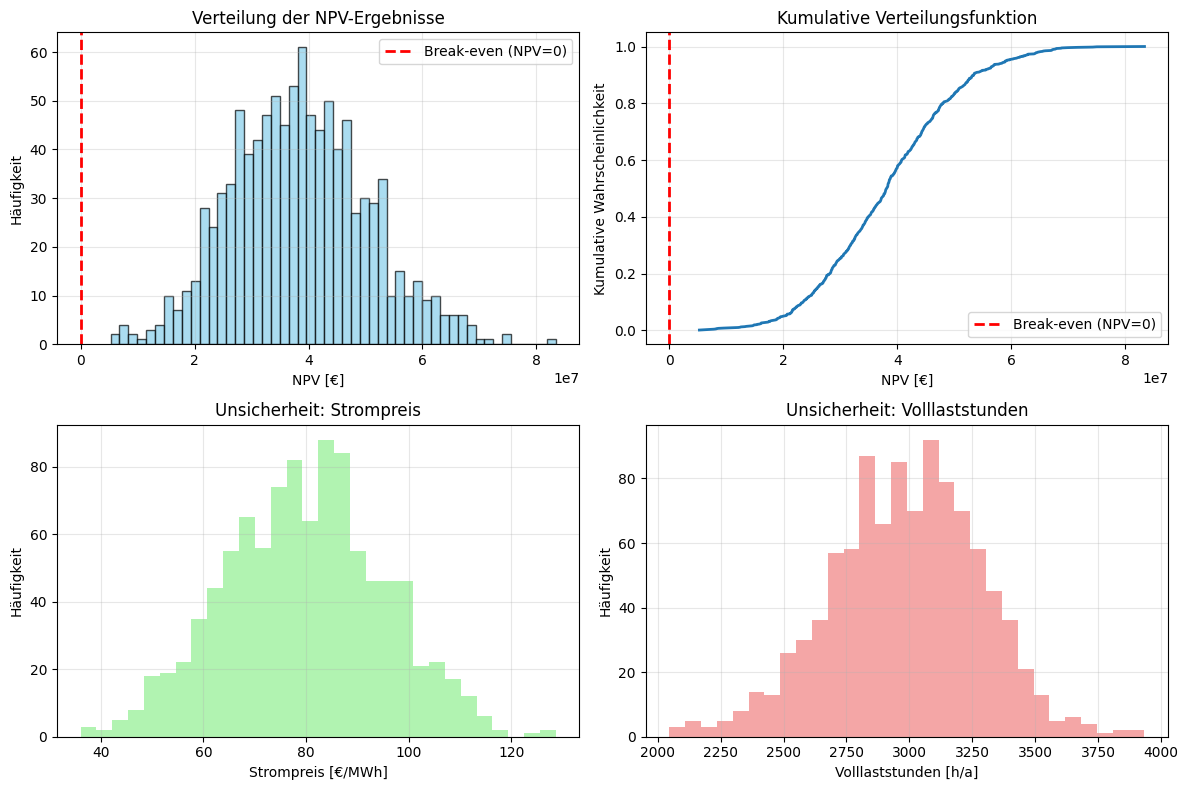

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Monte-Carlo-Simulation f√ºr Kraftwerks-NPV
def monte_carlo_npv_simulation(n_simulationen=1000):
    np.random.seed(42)  # F√ºr reproduzierbare Ergebnisse

    # Unsichere Parameter (Normalverteilungen)
    strompreis_mean, strompreis_std = 80, 15  # ‚Ç¨/MWh
    vollaststunden_mean, vollaststunden_std = 3000, 300  # h/a
    investition_mean, investition_std = 2000000, 200000  # ‚Ç¨

    # Fixe Parameter
    leistung_mw = 20
    vom = 10  # ‚Ç¨/MWh
    fom = 50000  # ‚Ç¨/MW/a
    laufzeit = 20  # Jahre
    zinssatz = 0.05

    npv_ergebnisse = []

    for i in range(n_simulationen):
        # Zuf√§llige Werte aus Normalverteilungen ziehen
        strompreis = np.random.normal(strompreis_mean, strompreis_std)
        vollaststunden = np.random.normal(vollaststunden_mean, vollaststunden_std)
        investition = np.random.normal(investition_mean, investition_std)

        # Sicherstellen, dass Werte positiv sind
        strompreis = max(strompreis, 0)
        vollaststunden = max(vollaststunden, 0)
        investition = max(investition, 0)

        # J√§hrliche Cashflows berechnen
        produktion_mwh = leistung_mw * vollaststunden
        einnahmen = strompreis * produktion_mwh
        kosten_vom = vom * produktion_mwh
        kosten_fom = fom * leistung_mw
        jahres_cashflow = einnahmen - kosten_vom - kosten_fom

        # NPV berechnen
        npv = -investition  # Jahr 0
        for jahr in range(1, laufzeit + 1):
            npv += jahres_cashflow / (1 + zinssatz) ** jahr

        npv_ergebnisse.append(npv)

    return np.array(npv_ergebnisse)

# Simulation durchf√ºhren
npv_results = monte_carlo_npv_simulation(1000)

# Ergebnisse analysieren
print("=== Monte-Carlo-Simulation: NPV-Analyse ===")
print(f"Anzahl Simulationen: {len(npv_results)}")
print(f"Mittlerer NPV: {np.mean(npv_results):,.0f} ‚Ç¨")
print(f"Standardabweichung: {np.std(npv_results):,.0f} ‚Ç¨")
print(f"Minimum: {np.min(npv_results):,.0f} ‚Ç¨")
print(f"Maximum: {np.max(npv_results):,.0f} ‚Ç¨")
print(f"Wahrscheinlichkeit NPV > 0: {(npv_results > 0).mean():.1%}")

# Visualisierung der NPV-Verteilung
plt.figure(figsize=(12, 8))

# Histogram
plt.subplot(2, 2, 1)
plt.hist(npv_results, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(0, color='red', linestyle='--', linewidth=2, label='Break-even (NPV=0)')
plt.xlabel('NPV [‚Ç¨]')
plt.ylabel('H√§ufigkeit')
plt.title('Verteilung der NPV-Ergebnisse')
plt.legend()
plt.grid(True, alpha=0.3)

# Kumulative Verteilung
plt.subplot(2, 2, 2)
sorted_npv = np.sort(npv_results)
cumulative = np.arange(1, len(sorted_npv) + 1) / len(sorted_npv)
plt.plot(sorted_npv, cumulative, linewidth=2)
plt.axvline(0, color='red', linestyle='--', linewidth=2, label='Break-even (NPV=0)')
plt.xlabel('NPV [‚Ç¨]')
plt.ylabel('Kumulative Wahrscheinlichkeit')
plt.title('Kumulative Verteilungsfunktion')
plt.legend()
plt.grid(True, alpha=0.3)

# Eingabeparameter visualisieren
plt.subplot(2, 2, 3)
strompreise = np.random.normal(80, 15, 1000)
plt.hist(strompreise, bins=30, alpha=0.7, color='lightgreen')
plt.xlabel('Strompreis [‚Ç¨/MWh]')
plt.ylabel('H√§ufigkeit')
plt.title('Unsicherheit: Strompreis')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
vollaststunden = np.random.normal(3000, 300, 1000)
plt.hist(vollaststunden, bins=30, alpha=0.7, color='lightcoral')
plt.xlabel('Volllaststunden [h/a]')
plt.ylabel('H√§ufigkeit')
plt.title('Unsicherheit: Volllaststunden')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 2.3.3 Boxplots

Zur Visualisierung der Ergebnisse verwenden wir **Boxplots**. Boxplots sind Diagramme, die hilfreich sind, um die Verteilung von Daten darzustellen und gleichzeitig wichtige Kennzahlen wie den **Median**, das **Minimum** und **Maximum** sowie das **untere Quartil (25%-Quartil)** und das **obere Quartil (75%-Quartil)** √ºbersichtlich zu pr√§sentieren.

Ein Boxplot l√§sst sich wie folgt interpretieren:

- **Median:** Teilt die Daten genau in der Mitte; 50 % der Datenpunkte liegen dar√ºber und 50 % darunter.
- **Unteres Quartil (Q1, 25 %):** 25 % der Datenpunkte liegen darunter, 75 % dar√ºber.
- **Oberes Quartil (Q3, 75 %):** 75 % der Datenpunkte liegen darunter, 25 % dar√ºber.
- **Interquartilsabstand (IQR):** Bereich zwischen oberem und unterem Quartil.
- **Whisker (Antennen):** Linien, die typischerweise das 1,5-fache des IQR umfassen. Datenpunkte au√üerhalb der Whisker gelten als Ausrei√üer.
- **Ausrei√üer:** Werte, die deutlich von den restlichen Daten abweichen.

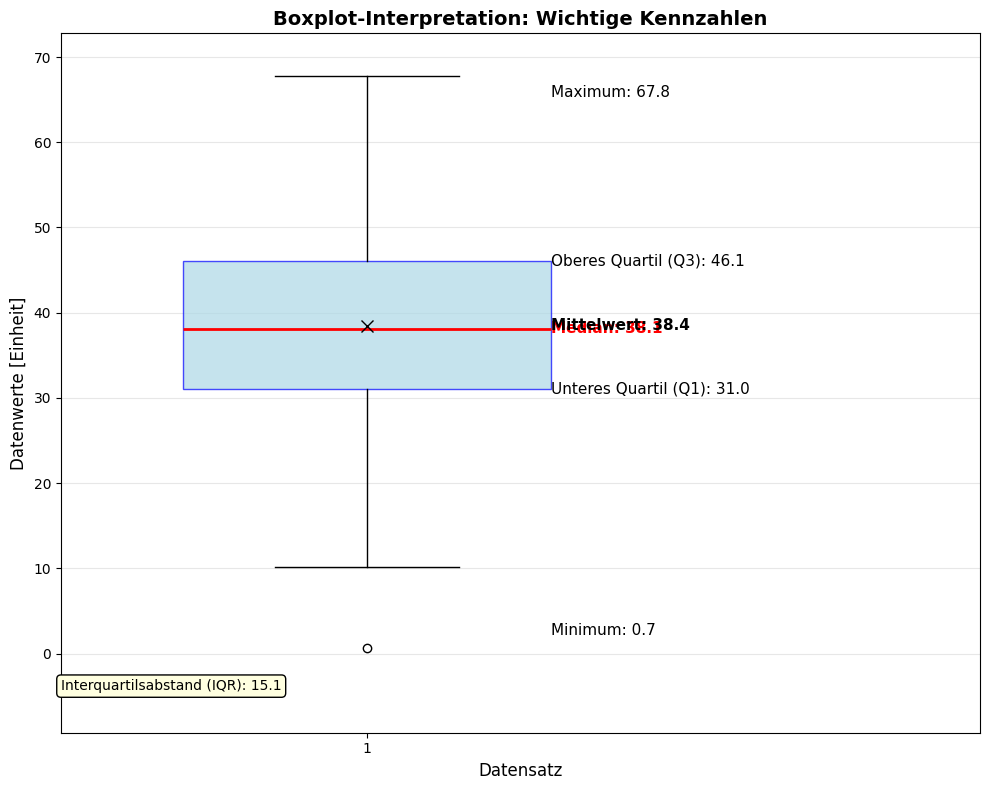

=== Boxplot-Kennzahlen ===
Minimum: 0.70
Q1 (25%-Quartil): 30.99
Median (50%-Quartil): 38.10
Mittelwert: 38.44
Q3 (75%-Quartil): 46.09
Maximum: 67.78
Interquartilsabstand (IQR): 15.10
Spannweite: 67.08


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Beispieldaten generieren
np.random.seed(42)
data = np.random.normal(40, 15, 100)

# Boxplot erstellen
plt.figure(figsize=(10, 8))

# Boxplot mit angepassten Eigenschaften
box_props = dict(facecolor='lightblue', color='blue', alpha=0.7)
median_props = dict(color='red', linewidth=2)
mean_props = dict(marker='x', markerfacecolor='black', markeredgecolor='black', markersize=8)

plt.boxplot(data, boxprops=box_props, medianprops=median_props, meanprops=mean_props,
            meanline=False, showmeans=True, widths=0.6, patch_artist=True)

# Kennzahlen berechnen
q1 = np.percentile(data, 25)
median = np.median(data)
q3 = np.percentile(data, 75)
minimum = np.min(data)
maximum = np.max(data)
mean = np.mean(data)

# Beschriftungen hinzuf√ºgen
plt.text(1.3, q3, f'Oberes Quartil (Q3): {q3:.1f}', fontsize=11, verticalalignment='center')
plt.text(1.3, median, f'Median: {median:.1f}', fontsize=11, verticalalignment='center', color='red', weight='bold')
plt.text(1.3, mean, f'Mittelwert: {mean:.1f}', fontsize=11, verticalalignment='center', color='black', weight='bold')
plt.text(1.3, q1, f'Unteres Quartil (Q1): {q1:.1f}', fontsize=11, verticalalignment='center')
plt.text(1.3, minimum + 2, f'Minimum: {minimum:.1f}', fontsize=11, verticalalignment='center')
plt.text(1.3, maximum - 2, f'Maximum: {maximum:.1f}', fontsize=11, verticalalignment='center')

# Zus√§tzliche Informationen
iqr = q3 - q1
plt.text(0.5, minimum - 5, f'Interquartilsabstand (IQR): {iqr:.1f}', fontsize=10,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow"))

# Achsentitel und Titel
plt.ylabel('Datenwerte [Einheit]', fontsize=12)
plt.title('Boxplot-Interpretation: Wichtige Kennzahlen', fontsize=14, weight='bold')
plt.xlabel('Datensatz', fontsize=12)

# Gitternetz
plt.grid(True, axis='y', alpha=0.3)

# Achsenlimits anpassen
plt.ylim(minimum - 10, maximum + 5)
plt.xlim(0.5, 2.0)

plt.tight_layout()
plt.show()

# Kennzahlen ausgeben
print("=== Boxplot-Kennzahlen ===")
print(f"Minimum: {minimum:.2f}")
print(f"Q1 (25%-Quartil): {q1:.2f}")
print(f"Median (50%-Quartil): {median:.2f}")
print(f"Mittelwert: {mean:.2f}")
print(f"Q3 (75%-Quartil): {q3:.2f}")
print(f"Maximum: {maximum:.2f}")
print(f"Interquartilsabstand (IQR): {iqr:.2f}")
print(f"Spannweite: {maximum - minimum:.2f}")

/var/folders/2d/nxl0wz4j7sbbmdh6ftll5xqc0000gn/T/ipykernel_67480/1446043919.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(technologien, labels=labels, patch_artist=True,


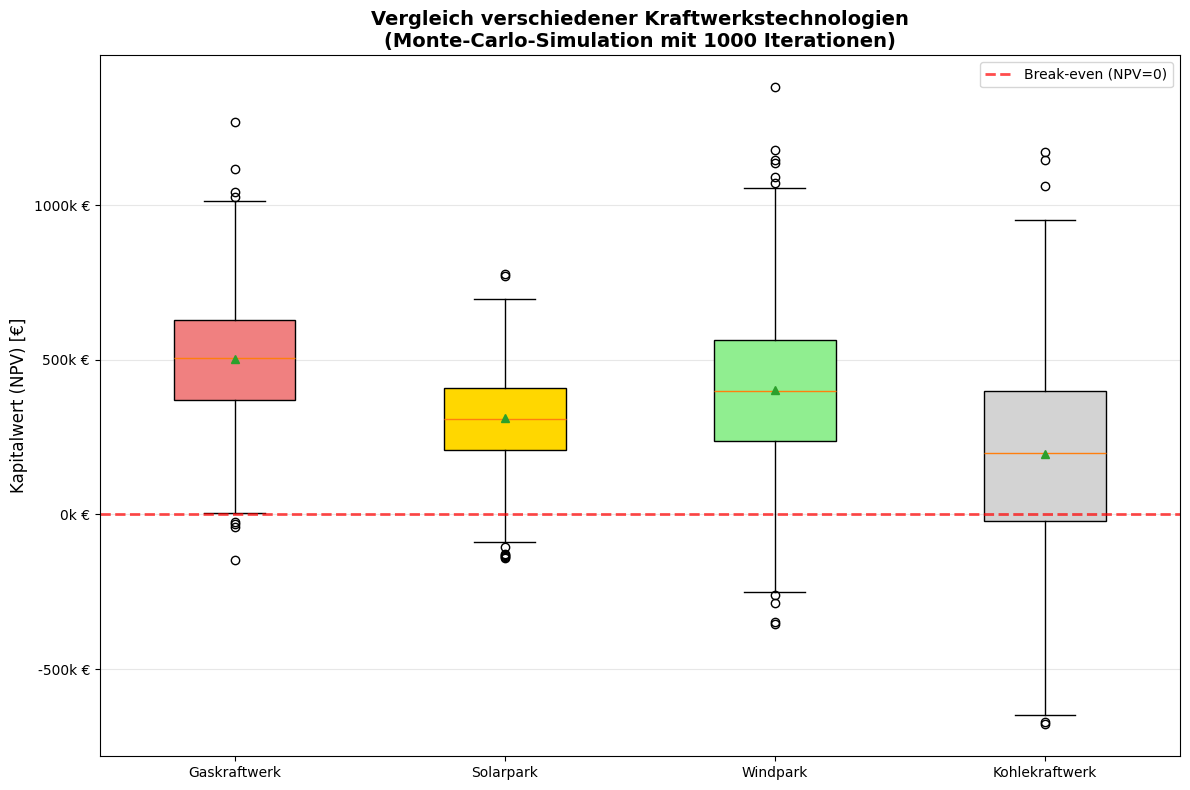

=== Investitionsrisiko-Analyse ===
Gaskraftwerk:
  Wahrscheinlichkeit NPV > 0: 99.6%
  Median NPV: 505,060 ‚Ç¨

Solarpark:
  Wahrscheinlichkeit NPV > 0: 98.2%
  Median NPV: 309,462 ‚Ç¨

Windpark:
  Wahrscheinlichkeit NPV > 0: 95.2%
  Median NPV: 399,937 ‚Ç¨

Kohlekraftwerk:
  Wahrscheinlichkeit NPV > 0: 72.4%
  Median NPV: 200,055 ‚Ç¨



In [4]:
# Vergleich mehrerer Technologien mit Boxplots
np.random.seed(42)

# Simulierte NPV-Daten f√ºr verschiedene Technologien
gas_npv = np.random.normal(500000, 200000, 1000)
solar_npv = np.random.normal(300000, 150000, 1000)
wind_npv = np.random.normal(400000, 250000, 1000)
kohle_npv = np.random.normal(200000, 300000, 1000)

# Daten f√ºr Boxplot vorbereiten
technologien = [gas_npv, solar_npv, wind_npv, kohle_npv]
labels = ['Gaskraftwerk', 'Solarpark', 'Windpark', 'Kohlekraftwerk']

# Boxplot erstellen
plt.figure(figsize=(12, 8))

# Farbschema definieren
colors = ['lightcoral', 'gold', 'lightgreen', 'lightgray']
box_props = [dict(facecolor=color, alpha=0.7) for color in colors]

# Boxplots erstellen
bp = plt.boxplot(technologien, labels=labels, patch_artist=True,
                 showmeans=True, meanline=False)

# Farben zuweisen
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Null-Linie hinzuf√ºgen
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Break-even (NPV=0)')

# Beschriftung
plt.ylabel('Kapitalwert (NPV) [‚Ç¨]', fontsize=12)
plt.title('Vergleich verschiedener Kraftwerkstechnologien\n(Monte-Carlo-Simulation mit 1000 Iterationen)',
          fontsize=14, weight='bold')
plt.grid(True, axis='y', alpha=0.3)
plt.legend()

# Y-Achse formatieren
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}k ‚Ç¨'))

plt.tight_layout()
plt.show()

# Wahrscheinlichkeiten f√ºr positive NPV berechnen
print("=== Investitionsrisiko-Analyse ===")
for i, (tech, data) in enumerate(zip(labels, technologien)):
    positive_npv = (data > 0).mean()
    median_npv = np.median(data)
    print(f"{tech}:")
    print(f"  Wahrscheinlichkeit NPV > 0: {positive_npv:.1%}")
    print(f"  Median NPV: {median_npv:,.0f} ‚Ç¨")
    print()

## 2.4 Hinweise

### Excel-Hinweise

Die Excel-Befehle sind hier generell auf Englisch angegeben. In Klammern steht jeweils die deutsche √úbersetzung, falls Sie mit einer deutschen Excel-Version arbeiten.
**Hinweis:** Wenn Sie ein deutsches Excel verwenden, m√ºssen die Argumente einer Funktion mit Semikolon (`;`) statt mit Komma (`,`) getrennt werden.
Beispiel: `REST(Zahl; Divisor)` statt `REST(Zahl, Divisor)`.

**Zufallszahlen aus einer Normalverteilung ziehen**

Um einen Wert aus einer Normalverteilung zu ziehen, verwenden Sie in Excel die Funktion:

```excel
NORM.INV(probability, mean, standard deviation)
```

F√ºr eine Zufallszahl verwenden Sie `RAND()` als probability-Argument:

```excel
NORM.INV(RAND(), mittelwert, standardabweichung)
```

**Praktische Tipps**

- Nutze separate Zellen f√ºr Parameter und Formeln.
- Diagramme f√ºr Szenarienvergleich und Sensitivit√§t sind sehr hilfreich.
- Beachte absolute vs. relative Zellbez√ºge f√ºr Wiederverwendbarkeit der Berechnung.

### Python-Alternative

F√ºr fortgeschrittene Nutzer bietet Python eine Alternative zu Excel:

```python
import numpy as np
import matplotlib.pyplot as plt

# NPV-Berechnung in Python
def berechne_npv(cashflows, zinssatz):
    """
    Berechnet den Kapitalwert (NPV) einer Investition

    Parameter:
    cashflows: Liste der Cashflows [Jahr0, Jahr1, Jahr2, ...]
    zinssatz: Diskontierungssatz (z.B. 0.05 f√ºr 5%)

    R√ºckgabe:
    NPV in der gleichen W√§hrungseinheit wie die Cashflows
    """
    return sum(cf / (1 + zinssatz)**t for t, cf in enumerate(cashflows))

# Beispiel: NPV-Berechnung
investition = -1000000  # Negative Zahl f√ºr Ausgabe
jaehrliche_rueckfluesse = [150000] * 10  # 10 Jahre √† 150.000‚Ç¨
cashflows = [investition] + jaehrliche_rueckfluesse
zinssatz = 0.05

npv = berechne_npv(cashflows, zinssatz)
print(f"Kapitalwert: {npv:,.2f} ‚Ç¨")

# Monte-Carlo-Simulation in Python
def monte_carlo_npv(n_simulationen=1000,
                   strompreis_params=(80, 15),
                   vollaststunden_params=(3000, 300),
                   investition_params=(2000000, 200000)):
    """
    Monte-Carlo-Simulation f√ºr NPV-Berechnung

    Parameter sind Tupel: (Mittelwert, Standardabweichung)
    """

    np.random.seed(42)  # Reproduzierbare Ergebnisse
    npv_ergebnisse = []

    # Fixe Parameter
    leistung_mw = 20
    vom = 10  # ‚Ç¨/MWh
    fom = 50000  # ‚Ç¨/MW/a
    laufzeit = 20
    zinssatz = 0.05

    for _ in range(n_simulationen):
        # Zufallswerte ziehen
        strompreis = max(0, np.random.normal(*strompreis_params))
        vollaststunden = max(0, np.random.normal(*vollaststunden_params))
        investition = max(0, np.random.normal(*investition_params))

        # Cashflows berechnen
        produktion = leistung_mw * vollaststunden
        jahres_cf = (strompreis - vom) * produktion - fom * leistung_mw

        # NPV berechnen
        cashflows = [-investition] + [jahres_cf] * laufzeit
        npv = berechne_npv(cashflows, zinssatz)
        npv_ergebnisse.append(npv)

    return np.array(npv_ergebnisse)

# Simulation ausf√ºhren
ergebnisse = monte_carlo_npv(1000)

# Statistiken ausgeben
print(f"Mittlerer NPV: {np.mean(ergebnisse):,.0f} ‚Ç¨")
print(f"Standardabweichung: {np.std(ergebnisse):,.0f} ‚Ç¨")
print(f"Wahrscheinlichkeit NPV > 0: {(ergebnisse > 0).mean():.1%}")

# Einfache Visualisierung
plt.figure(figsize=(10, 6))
plt.hist(ergebnisse, bins=50, alpha=0.7, edgecolor='black')
plt.axvline(0, color='red', linestyle='--', label='Break-even')
plt.xlabel('NPV [‚Ç¨]')
plt.ylabel('H√§ufigkeit')
plt.title('Monte-Carlo-Simulation: NPV-Verteilung')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Boxplot f√ºr Technologievergleich
def technologie_vergleich():
    """Vergleicht verschiedene Kraftwerkstechnologien"""

    # Parameter f√ºr verschiedene Technologien
    technologien = {
        'Gas': {'strompreis': (80, 15), 'vollast': (4000, 400), 'invest': (1500000, 150000)},
        'Solar': {'strompreis': (85, 20), 'vollast': (1200, 200), 'invest': (2500000, 250000)},
        'Wind': {'strompreis': (82, 18), 'vollast': (2500, 500), 'invest': (3000000, 300000)}
    }

    ergebnisse = {}

    for name, params in technologien.items():
        npv_werte = monte_carlo_npv(500,
                                   params['strompreis'],
                                   params['vollast'],
                                   params['invest'])
        ergebnisse[name] = npv_werte

    # Boxplot erstellen
    plt.figure(figsize=(10, 6))
    plt.boxplot(ergebnisse.values(), labels=ergebnisse.keys(),
                patch_artist=True, showmeans=True)
    plt.axhline(0, color='red', linestyle='--', alpha=0.7, label='Break-even')
    plt.ylabel('NPV [‚Ç¨]')
    plt.title('Technologievergleich: NPV-Unsicherheiten')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

    # Statistiken ausgeben
    for name, werte in ergebnisse.items():
        print(f"{name}: Median NPV = {np.median(werte):,.0f} ‚Ç¨, "
              f"P(NPV>0) = {(werte > 0).mean():.1%}")

# Funktionen f√ºr Sensitivit√§tsanalyse
def sensitivitaetsanalyse(parameter='strompreis', variation_prozent=20):
    """
    F√ºhrt eine Sensitivit√§tsanalyse f√ºr einen Parameter durch
    """

    # Basis-NPV berechnen
    basis_cf = [-2000000] + [2200000] * 20  # Vereinfachtes Beispiel
    basis_npv = berechne_npv(basis_cf, 0.05)

    # Variationen testen
    variationen = np.linspace(-variation_prozent/100, variation_prozent/100, 21)
    npv_werte = []

    for var in variationen:
        # Parameter variieren (vereinfacht)
        cf_variiert = [-2000000] + [2200000 * (1 + var)] * 20
        npv_var = berechne_npv(cf_variiert, 0.05)
        npv_werte.append(npv_var)

    # Visualisierung
    plt.figure(figsize=(10, 6))
    plt.plot(variationen * 100, npv_werte, 'b-', linewidth=2, marker='o')
    plt.axhline(0, color='red', linestyle='--', alpha=0.7)
    plt.axvline(0, color='gray', linestyle='-', alpha=0.5)
    plt.xlabel(f'{parameter.capitalize()} Variation [%]')
    plt.ylabel('NPV [‚Ç¨]')
    plt.title(f'Sensitivit√§tsanalyse: {parameter.capitalize()}')
    plt.grid(True, alpha=0.3)
    plt.show()

    print(f"Basis-NPV: {basis_npv:,.0f} ‚Ç¨")
    print(f"NPV-Spanne bei ¬±{variation_prozent}% {parameter}: "
          f"{min(npv_werte):,.0f} ‚Ç¨ bis {max(npv_werte):,.0f} ‚Ç¨")

# Verwendungsbeispiele auskommentiert:
# technologie_vergleich()
# sensitivitaetsanalyse('strompreis', 30)

## 2.5 Lernkontrollfragen

Die folgenden Fragen dienen Ihrer Selbst√ºberpr√ºfung und haben keinen Einfluss auf die Bonuspunkte der Fallstudie.

In [8]:
# Multiple-Choice-System - funktioniert ohne ipywidgets
import matplotlib.pyplot as plt

class LernkontrolleFragen:
    def __init__(self):
        self.punkte = 0
        self.fragen_beantwortet = []

    def frage_1(self):
        print("=== Frage 1: Cashflows bei Solarkraftwerken ===")
        print("Welche Cashflows treten bei einem Photovoltaikkraftwerk NICHT auf?")
        print("(Mehrfachauswahl m√∂glich)")
        print()
        print("A) CF_CO2 (CO‚ÇÇ-Kosten)")
        print("B) CF_sell (Verkauf von Strom)")
        print("C) CF_fuel (Brennstoffkosten)")
        print()

        antwort = input("Ihre Antwort (z.B. 'AC' f√ºr A und C): ").upper().strip()

        korrekt = set(['A', 'C'])  # A und C sind richtig
        eingabe = set(antwort)

        if eingabe == korrekt:
            print("‚úÖ Richtig! Photovoltaik braucht weder Brennstoff noch verursacht CO‚ÇÇ-Emissionen.")
            self.punkte += 1
        else:
            print("‚ùå Nicht ganz richtig.")
            print("Korrekte Antwort: A und C")
            print("Erkl√§rung: Solaranlagen haben keine Brennstoffkosten und keine direkten CO‚ÇÇ-Emissionen.")
        print(f"Aktuelle Punkte: {self.punkte}")
        print("-" * 50)

    def frage_2(self):
        print("=== Frage 2: Fixe Betriebskosten ===")
        print("Fixe Betriebs- und Wartungskosten (FOM-Kosten)...")
        print()
        print("A) ...h√§ngen vom CO‚ÇÇ-Preis ab")
        print("B) ...k√∂nnen in der Einheit ‚Ç¨/MWh/a angegeben werden")
        print("C) ...beschreiben Kosten, die unabh√§ngig von der Stromerzeugung auftreten")
        print()

        antwort = input("Ihre Antwort (A, B oder C): ").upper().strip()

        if antwort == 'C':
            print("‚úÖ Richtig! FOM-Kosten sind fix und unabh√§ngig von der Produktion.")
            self.punkte += 1
        else:
            print("‚ùå Nicht richtig.")
            print("Korrekte Antwort: C")
            print("Erkl√§rung: FOM-Kosten sind fixe Kosten (‚Ç¨/MW/a), die unabh√§ngig von der")
            print("tats√§chlichen Stromproduktion anfallen (z.B. Personal, Wartung).")
        print(f"Aktuelle Punkte: {self.punkte}")
        print("-" * 50)

    def frage_3(self):
        print("=== Frage 3: Kapitalwert (NPV) ===")
        print("Der Kapitalwert (NPV)...")
        print("(Mehrfachauswahl m√∂glich)")
        print()
        print("A) ...basiert auf der Idee, dass Einnahmen in ferner Zukunft wertvoller sind")
        print("B) ...ist unabh√§ngig von Wartungskosten")
        print("C) ...ist ein Ma√ü zur Bewertung von Investitionen")
        print()

        antwort = input("Ihre Antwort (z.B. 'BC' f√ºr B und C): ").upper().strip()

        if antwort == 'C':
            print("‚úÖ Richtig! Nur C ist korrekt.")
            self.punkte += 1
        else:
            print("‚ùå Nicht richtig.")
            print("Korrekte Antwort: C")
            print("Erkl√§rung: NPV diskontiert zuk√ºnftige Cashflows ab (A falsch),")
            print("ber√ºcksichtigt alle Kosten inkl. Wartung (B falsch) und")
            print("ist ein wichtiges Investitionsbewertungstool (C richtig).")
        print(f"Aktuelle Punkte: {self.punkte}")
        print("-" * 50)

    def frage_4(self):
        print("=== Frage 4: Normalverteilung ===")
        print("Die Normalverteilung...")
        print("(Mehrfachauswahl m√∂glich)")
        print()
        print("A) ...kann jede beliebige Verteilung exakt beschreiben")
        print("B) ...wird h√§ufig genutzt, um Zufallsvariablen zu beschreiben")
        print("C) ...h√§ngt vom Mittelwert und der Standardabweichung ab")
        print()

        antwort = input("Ihre Antwort (z.B. 'BC' f√ºr B und C): ").upper().strip()

        korrekt = set(['B', 'C'])
        eingabe = set(antwort)

        if eingabe == korrekt:
            print("‚úÖ Richtig! B und C sind korrekt.")
            self.punkte += 1
        else:
            print("‚ùå Nicht ganz richtig.")
            print("Korrekte Antwort: B und C")
            print("Erkl√§rung: Normalverteilung ist eine Approximation (A falsch),")
            print("wird h√§ufig verwendet (B richtig) und wird durch Œº und œÉ definiert (C richtig).")
        print(f"Aktuelle Punkte: {self.punkte}")
        print("-" * 50)

    def frage_5(self):
        print("=== Frage 5: Monte-Carlo-Simulation ===")
        print("Was macht man bei einer Monte-Carlo-Simulation?")
        print("(Mehrfachauswahl m√∂glich)")
        print()
        print("A) Roulette spielen")
        print("B) Das System mehrfach mit verschiedenen Eingabeparametern berechnen")
        print("C) Schl√ºsse √ºber komplexe Systeme aus multiplen Berechnungen ziehen")
        print("D) Eingabeparameter zuf√§llig aus Verteilungen ziehen")
        print()

        antwort = input("Ihre Antwort (z.B. 'BCD' f√ºr B, C und D): ").upper().strip()

        korrekt = set(['B', 'C', 'D'])
        eingabe = set(antwort)

        if eingabe == korrekt:
            print("‚úÖ Richtig! B, C und D beschreiben Monte-Carlo-Simulation korrekt.")
            self.punkte += 1
        else:
            print("‚ùå Nicht ganz richtig.")
            print("Korrekte Antwort: B, C und D")
            print("Erkl√§rung: Monte-Carlo simuliert Systeme durch multiple Berechnungen")
            print("mit zuf√§lligen Parametern aus Verteilungen, um komplexe Systeme zu verstehen.")
        print(f"Aktuelle Punkte: {self.punkte}")
        print("-" * 50)

    def alle_fragen(self):
        print("üéì LERNKONTROLLE: Theoretische Grundlagen")
        print("=" * 60)
        print()

        self.frage_1()
        self.frage_2()
        self.frage_3()
        self.frage_4()
        self.frage_5()

        print("=" * 60)
        print(f"üéØ ENDERGEBNIS: {self.punkte}/5 Punkte")

        if self.punkte == 5:
            print("üèÜ Ausgezeichnet! Sie haben alle Konzepte verstanden.")
        elif self.punkte >= 3:
            print("üëç Gut gemacht! Die wichtigsten Konzepte sind verstanden.")
        else:
            print("üìö Bitte wiederholen Sie die entsprechenden Abschnitte.")

        return self.punkte

# Verwendung:
# quiz = LernkontrolleFragen()
# quiz.alle_fragen()

### Interaktive Nutzung

Um die Lernkontrolle zu starten, f√ºhren Sie folgenden Code aus:

```python
# Lernkontrolle starten
quiz = LernkontrolleFragen()
quiz.alle_fragen()
```

### Einzelne Fragen

Sie k√∂nnen auch einzelne Fragen bearbeiten:

```python
quiz = LernkontrolleFragen()
quiz.frage_1()  # Nur Frage 1
quiz.frage_2()  # Nur Frage 2
# etc.
```

In [9]:
# Lernkontrolle starten
quiz = LernkontrolleFragen()
quiz.alle_fragen()

üéì LERNKONTROLLE: Theoretische Grundlagen

=== Frage 1: Cashflows bei Solarkraftwerken ===
Welche Cashflows treten bei einem Photovoltaikkraftwerk NICHT auf?
(Mehrfachauswahl m√∂glich)

A) CF_CO2 (CO‚ÇÇ-Kosten)
B) CF_sell (Verkauf von Strom)
C) CF_fuel (Brennstoffkosten)



KeyboardInterrupt: Interrupted by user